In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import statsmodels as sm
import seaborn as sns
import yellowbrick as yb
%matplotlib inline
sns.set()

C:\Users\Jungd\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
df = pd.read_csv("C:/Users/Jungd/Desktop/Data_Science/Survey_2020/FEVS_2019_PRDF_Clean.csv")
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [4]:
df.shape

(246068, 80)

In [5]:
df.columns

Index(['Unnamed: 0', 'AGENCY', 'LEVEL1', 'leaving', 'sex', 'education',
       'tenure', 'supervisor', 'minority', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6',
       'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16',
       'Q17', 'Q18', 'Q19', 'Q20', 'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26',
       'Q27', 'Q28', 'Q29', 'Q30', 'Q31', 'Q32', 'Q33', 'Q34', 'Q35', 'Q36',
       'Q37', 'Q38', 'Q39', 'Q40', 'Q41', 'Q42', 'Q43', 'Q44', 'Q45', 'Q46',
       'Q47', 'Q48', 'Q49', 'Q50', 'Q51', 'Q52', 'Q53', 'Q54', 'Q55', 'Q56',
       'Q57', 'Q58', 'Q59', 'Q60', 'Q61', 'Q62', 'Q63', 'Q64', 'Q65', 'Q66',
       'Q67', 'Q68', 'Q69', 'Q70', 'Q71'],
      dtype='object')

In [6]:
df.describe()

,Unnamed: 0,leaving,sex,education,tenure,supervisor,minority,Q1,Q2,Q3,...,Q62,Q63,Q64,Q65,Q66,Q67,Q68,Q69,Q70,Q71
count,246068.00,246068.00,246068.00,246068.00,246068.00,246068.00,246068.00,246068.00,246068.00,246068.00,...,246068.00,246068.00,246068.00,246068.00,246068.00,246068.00,246068.00,246068.00,246068.00,246068.00
mean,188514.80,0.23,0.42,2.09,1.81,0.25,0.34,3.92,3.93,3.83,...,3.74,3.65,3.58,3.62,3.50,3.34,3.67,3.93,3.71,3.78
std,109741.83,0.42,0.49,0.80,0.79,0.43,0.47,1.04,0.95,1.13,...,1.12,1.09,1.12,1.15,1.12,1.22,1.08,1.00,1.11,1.06
min,0.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
25%,92285.25,0.00,0.00,1.00,1.00,0.00,0.00,4.00,4.00,3.00,...,3.00,3.00,3.00,3.00,3.00,2.00,3.00,4.00,3.00,3.00
50%,188450.00,0.00,0.00,2.00,2.00,0.00,0.00,4.00,4.00,4.00,...,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00
75%,282984.50,0.00,1.00,3.00,2.00,0.00,1.00,5.00,5.00,5.00,...,5.00,4.00,4.00,4.00,4.00,4.00,4.00,5.00,4.00,4.00
max,380446.00,1.00,1.00,3.00,3.00,1.00,1.00,5.00,5.00,5.00,...,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00


In [7]:
df = df.drop(columns=['Unnamed: 0', 'AGENCY', 'LEVEL1'])

In [8]:
df.shape

(246068, 77)

In [9]:
df.columns

Index(['leaving', 'sex', 'education', 'tenure', 'supervisor', 'minority', 'Q1',
       'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12',
       'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21', 'Q22',
       'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'Q29', 'Q30', 'Q31', 'Q32',
       'Q33', 'Q34', 'Q35', 'Q36', 'Q37', 'Q38', 'Q39', 'Q40', 'Q41', 'Q42',
       'Q43', 'Q44', 'Q45', 'Q46', 'Q47', 'Q48', 'Q49', 'Q50', 'Q51', 'Q52',
       'Q53', 'Q54', 'Q55', 'Q56', 'Q57', 'Q58', 'Q59', 'Q60', 'Q61', 'Q62',
       'Q63', 'Q64', 'Q65', 'Q66', 'Q67', 'Q68', 'Q69', 'Q70', 'Q71'],
      dtype='object')

In [10]:
X = df[['sex', 'education', 'tenure', 'supervisor', 'minority', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18','Q19', 'Q20', 'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28','Q29', 'Q30', 'Q31', 'Q32', 'Q33', 'Q34', 'Q35', 'Q36', 'Q37', 'Q38','Q39', 'Q40', 'Q41', 'Q42', 'Q43', 'Q44', 'Q45', 'Q46', 'Q47', 'Q48','Q49', 'Q50', 'Q51', 'Q52', 'Q53', 'Q54', 'Q55', 'Q56', 'Q57', 'Q58','Q59', 'Q60', 'Q61', 'Q62', 'Q63', 'Q64', 'Q65', 'Q66', 'Q67', 'Q68','Q69', 'Q70', 'Q71']]
y = df.leaving

In [11]:
X.describe()

,sex,education,tenure,supervisor,minority,Q1,Q2,Q3,Q4,Q5,...,Q62,Q63,Q64,Q65,Q66,Q67,Q68,Q69,Q70,Q71
count,246068.00,246068.00,246068.00,246068.00,246068.00,246068.00,246068.00,246068.00,246068.00,246068.00,...,246068.00,246068.00,246068.00,246068.00,246068.00,246068.00,246068.00,246068.00,246068.00,246068.00
mean,0.42,2.09,1.81,0.25,0.34,3.92,3.93,3.83,4.05,4.27,...,3.74,3.65,3.58,3.62,3.50,3.34,3.67,3.93,3.71,3.78
std,0.49,0.80,0.79,0.43,0.47,1.04,0.95,1.13,0.99,0.83,...,1.12,1.09,1.12,1.15,1.12,1.22,1.08,1.00,1.11,1.06
min,0.00,1.00,1.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
25%,0.00,1.00,1.00,0.00,0.00,4.00,4.00,3.00,4.00,4.00,...,3.00,3.00,3.00,3.00,3.00,2.00,3.00,4.00,3.00,3.00
50%,0.00,2.00,2.00,0.00,0.00,4.00,4.00,4.00,4.00,4.00,...,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00
75%,1.00,3.00,2.00,0.00,1.00,5.00,5.00,5.00,5.00,5.00,...,5.00,4.00,4.00,4.00,4.00,4.00,4.00,5.00,4.00,4.00
max,1.00,3.00,3.00,1.00,1.00,5.00,5.00,5.00,5.00,5.00,...,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00


import statsmodels.api as sm
X1 = sm.add_constant(X) 
model5 = sm.OLS(y, X1).fit()
predictions = model5.predict(X)
model5.summary()

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

model = LogisticRegression(random_state=42)
model2 = model.fit(X, y)
prediction = model2.predict(X)

print(model2.coef_)
print(model2.intercept_)
print(model2.score(X, y))

C:\Users\Jungd\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[[-0.16659979  0.14493326 -0.42644243  0.17513232  0.26319528 -0.01107079
   0.06066317  0.04047473 -0.0564889  -0.10499199 -0.06503524  0.00304128
   0.2093342  -0.01529887 -0.02030235 -0.14685228  0.10537903 -0.02570585
  -0.00255366  0.04703074  0.05665681  0.02115714 -0.06046414  0.01848354
  -0.00700279 -0.02189701 -0.00945455 -0.02150648  0.01440381 -0.00497005
  -0.02262028  0.03480983 -0.02475923  0.01720989  0.05000735  0.04057474
   0.01411476  0.00647676  0.00293908  0.08844218  0.03333067 -0.06987203
  -0.02034513  0.15453594 -0.38980506 -0.03731756 -0.00968728  0.0207409
  -0.06863458  0.07937691  0.00535669  0.00656741  0.07582376 -0.00879362
   0.00580071 -0.08372316 -0.07866833 -0.0209134   0.00533954  0.0360394
  -0.03967093  0.0194673  -0.01845095  0.06534875 -0.04088875  0.04495739
  -0.04197877  0.04198337  0.02976687  0.02441476  0.09373894 -0.40959271
   0.05188855 -0.43976606 -0.11235743 -0.21680383]]
[2.79769376]
0.8210860412568883


In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
XA = scaler.transform(X)
XA

array([[-0.84252624, -1.36409002,  0.23576956, ...,  0.06566454,
         0.2600151 ,  0.21139981],
       [-0.84252624, -0.11290129, -1.03632938, ...,  0.06566454,
         0.2600151 ,  0.21139981],
       [ 1.18690665, -0.11290129,  1.50786851, ..., -0.93451761,
        -0.63759146,  0.21139981],
       ...,
       [ 1.18690665, -0.11290129,  0.23576956, ...,  0.06566454,
         0.2600151 ,  0.21139981],
       [ 1.18690665, -0.11290129, -1.03632938, ...,  0.06566454,
        -1.53519803,  0.21139981],
       [-0.84252624,  1.13828744,  0.23576956, ..., -0.93451761,
         0.2600151 ,  0.21139981]])

In [14]:
X_train, X_test, y_train, y_test = train_test_split(XA, y, train_size=0.8, test_size=0.2, random_state=42)

mlr = LogisticRegression(random_state=42)
mlr.fit(X_train, y_train) 
y_predict = mlr.predict(X_test)
print(mlr.coef_)
print(mlr.intercept_)
print(mlr.score(X_train, y_train))
print(mlr.score(X_test, y_test))

[[-0.09031669  0.11827742 -0.34615964  0.05555021  0.12901898 -0.02543169
   0.05922504  0.04721941 -0.05633212 -0.08678019 -0.06134075  0.00200357
   0.14360068 -0.02068063 -0.01895813 -0.17221903  0.08804895 -0.02691806
  -0.00104253  0.04286037  0.04819742  0.02614209 -0.06234624  0.0191038
  -0.01806841 -0.02686286 -0.00735388 -0.02026427  0.01606834 -0.00182612
  -0.01663079  0.04271931 -0.01775559  0.01066132  0.05442712  0.03966968
   0.02078053  0.00303042 -0.00091906  0.08473189  0.03176494 -0.07938431
  -0.02754977  0.13689901 -0.40173085 -0.03816766 -0.02111527  0.03048822
  -0.07079983  0.08751386  0.01019388  0.00910396  0.07441595  0.00101549
   0.00767993 -0.08824307 -0.10111381 -0.02567369 -0.00151011  0.03383289
  -0.03653065  0.01684699 -0.02797944  0.07133358 -0.0488729   0.06170268
  -0.05345652  0.04959743  0.04211477  0.02673102  0.11174673 -0.50103518
   0.05338312 -0.43835653 -0.12392964 -0.23265359]]
[-1.54998068]
0.8216343076594836
0.8199496078351689


In [15]:
mlr = LogisticRegression(penalty='elasticnet', l1_ratio=.5, multi_class="auto", solver="saga", random_state=42)
mlr.fit(X_train, y_train) 
y_predict = mlr.predict(X_test)
print(mlr.coef_)
print(mlr.intercept_)
print(mlr.score(X_train, y_train))
print(mlr.score(X_test, y_test))

[[-0.09027329  0.11827996 -0.34613925  0.0555368   0.129013   -0.02537519
   0.05917918  0.0471721  -0.05630211 -0.08678244 -0.06129082  0.00197121
   0.14357697 -0.02063495 -0.01897107 -0.17219606  0.08798596 -0.02684703
  -0.00098566  0.04282866  0.04818507  0.02610529 -0.06229248  0.01910359
  -0.01804658 -0.02684814 -0.0073057  -0.02017529  0.01592887 -0.00173328
  -0.01661172  0.04265079 -0.01769118  0.01061085  0.05442856  0.03962802
   0.02078225  0.00295674 -0.00087444  0.08469666  0.03175759 -0.07935936
  -0.02751317  0.1368376  -0.40167247 -0.0381684  -0.0210795   0.03041796
  -0.07057055  0.08746183  0.01007275  0.00904138  0.07425727  0.00103643
   0.00763609 -0.08806252 -0.10111021 -0.02556188 -0.00144589  0.03375406
  -0.03631773  0.01665385 -0.02796491  0.07132005 -0.04884334  0.06156282
  -0.05338036  0.04954919  0.04206363  0.02670652  0.11168462 -0.50100814
   0.05332359 -0.43830434 -0.12390129 -0.23262022]]
[-1.54994623]
0.8216190679386753
0.8199496078351689


In [16]:
import statsmodels.api as sm
X1 = sm.add_constant(XA) 
model5 = sm.Logit(y, X1).fit()
print(model5.summary())

Optimization terminated successfully.
         Current function value: 0.410850
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                leaving   No. Observations:               246068
Model:                          Logit   Df Residuals:                   245991
Method:                           MLE   Df Model:                           76
Date:                Thu, 16 Apr 2020   Pseudo R-squ.:                  0.2435
Time:                        10:16:08   Log-Likelihood:            -1.0110e+05
converged:                       True   LL-Null:                   -1.3364e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.5480      0.006   -246.776      0.000      -1.560      -1.536
x1            -0.0862      0.

C:\Users\Jungd\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


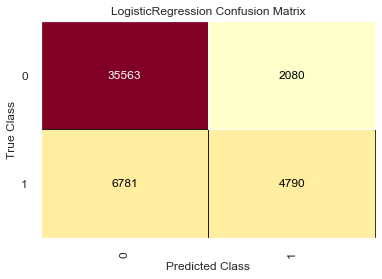

In [17]:
from yellowbrick.classifier import ConfusionMatrix

model = LogisticRegression(multi_class="auto", solver="liblinear")
cm = ConfusionMatrix(model, classes=[0,1])
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show()

C:\Users\Jungd\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


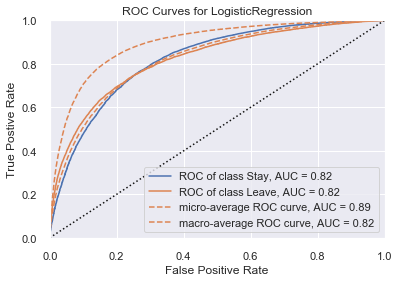

In [18]:
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(model, classes=["Stay", "Leave"])
visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()   

C:\Users\Jungd\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


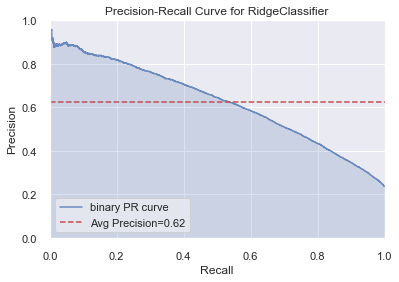

In [19]:
from sklearn.linear_model import RidgeClassifier
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(RidgeClassifier())
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

C:\Users\Jungd\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


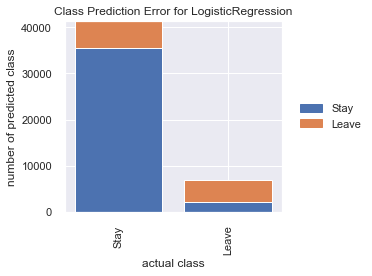

In [20]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(LogisticRegression(random_state=42), classes=["Stay", "Leave"])
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

C:\Users\Jungd\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
C:\Users\Jungd\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Jungd\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Jungd\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=F

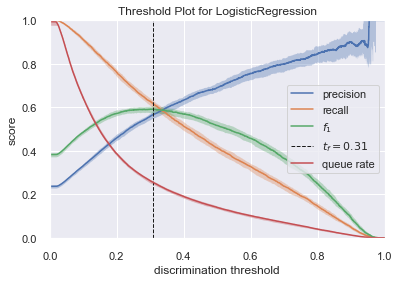

In [21]:
from yellowbrick.classifier import DiscriminationThreshold

model = LogisticRegression(multi_class="auto", solver="liblinear")
visualizer = DiscriminationThreshold(model)
visualizer.fit(X_test, y_test)      
visualizer.show()   

from yellowbrick.model_selection import ValidationCurve

viz = ValidationCurve(LogisticRegression(),param_name="Logit", param_range=???, cv=8, scoring="f1_weighted", random_state=42)
viz.fit(X_test, y_test)
viz.show()

C:\Users\Jungd\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


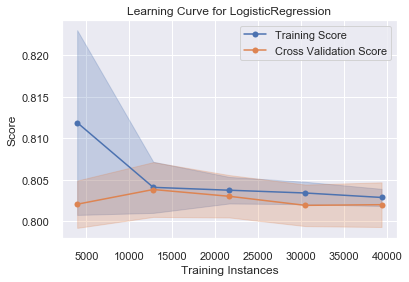

In [22]:
from yellowbrick.model_selection import LearningCurve

model = LogisticRegression(multi_class="auto", solver="liblinear", random_state=42)
visualizer = LearningCurve(model, scoring='f1_weighted')
visualizer.fit(X_test, y_test)        # Fit the data to the visualizer
visualizer.show()  

C:\Users\Jungd\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


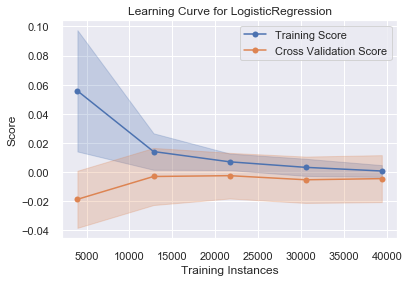

In [24]:
from yellowbrick.model_selection import LearningCurve

visualizer = LearningCurve(model, scoring='r2')
visualizer.fit(X_test, y_test)        # Fit the data to the visualizer
visualizer.show() 

In [25]:
target_names = ['Stay', 'Leave']
print(classification_report(y_test, y_predict, target_names=target_names))

              precision    recall  f1-score   support

        Stay       0.84      0.94      0.89     37643
       Leave       0.70      0.41      0.52     11571

    accuracy                           0.82     49214
   macro avg       0.77      0.68      0.70     49214
weighted avg       0.81      0.82      0.80     49214



C:\Users\Jungd\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


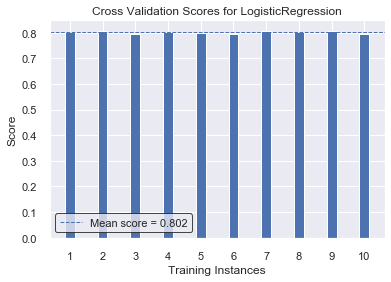

In [26]:
from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import CVScores
# Create a cross-validation strategy
cv = StratifiedKFold(n_splits=10, random_state=42)
# Instantiate the classification model and visualizer
visualizer = CVScores(model, cv=cv, scoring='f1_weighted')
visualizer.fit(X_test, y_test)        # Fit the data to the visualizer
visualizer.show()

In [27]:
mlr.coef_

array([[-0.09027329,  0.11827996, -0.34613925,  0.0555368 ,  0.129013  ,
        -0.02537519,  0.05917918,  0.0471721 , -0.05630211, -0.08678244,
        -0.06129082,  0.00197121,  0.14357697, -0.02063495, -0.01897107,
        -0.17219606,  0.08798596, -0.02684703, -0.00098566,  0.04282866,
         0.04818507,  0.02610529, -0.06229248,  0.01910359, -0.01804658,
        -0.02684814, -0.0073057 , -0.02017529,  0.01592887, -0.00173328,
        -0.01661172,  0.04265079, -0.01769118,  0.01061085,  0.05442856,
         0.03962802,  0.02078225,  0.00295674, -0.00087444,  0.08469666,
         0.03175759, -0.07935936, -0.02751317,  0.1368376 , -0.40167247,
        -0.0381684 , -0.0210795 ,  0.03041796, -0.07057055,  0.08746183,
         0.01007275,  0.00904138,  0.07425727,  0.00103643,  0.00763609,
        -0.08806252, -0.10111021, -0.02556188, -0.00144589,  0.03375406,
        -0.03631773,  0.01665385, -0.02796491,  0.07132005, -0.04884334,
         0.06156282, -0.05338036,  0.04954919,  0.0

In [28]:
df2 = mlr.coef_

In [29]:
df2.shape

(1, 76)

In [30]:
dfm = pd.DataFrame([-0.09027329,  0.11827996, -0.34613925,  0.0555368 ,  0.129013  ,
        -0.02537519,  0.05917918,  0.0471721 , -0.05630211, -0.08678244,
        -0.06129082,  0.00197121,  0.14357697, -0.02063495, -0.01897107,
        -0.17219606,  0.08798596, -0.02684703, -0.00098566,  0.04282866,
         0.04818507,  0.02610529, -0.06229248,  0.01910359, -0.01804658,
        -0.02684814, -0.0073057 , -0.02017529,  0.01592887, -0.00173328,
        -0.01661172,  0.04265079, -0.01769118,  0.01061085,  0.05442856,
         0.03962802,  0.02078225,  0.00295674, -0.00087444,  0.08469666,
         0.03175759, -0.07935936, -0.02751317,  0.1368376 , -0.40167247,
        -0.0381684 , -0.0210795 ,  0.03041796, -0.07057055,  0.08746183,
         0.01007275,  0.00904138,  0.07425727,  0.00103643,  0.00763609,
        -0.08806252, -0.10111021, -0.02556188, -0.00144589,  0.03375406,
        -0.03631773,  0.01665385, -0.02796491,  0.07132005, -0.04884334,
         0.06156282, -0.05338036,  0.04954919,  0.04206363,  0.02670652,
         0.11168462, -0.50100814,  0.05332359, -0.43830434, -0.12390129,
        -0.23262022], columns=["Weights"])

In [31]:
X.columns

Index(['sex', 'education', 'tenure', 'supervisor', 'minority', 'Q1', 'Q2',
       'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13',
       'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21', 'Q22', 'Q23',
       'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'Q29', 'Q30', 'Q31', 'Q32', 'Q33',
       'Q34', 'Q35', 'Q36', 'Q37', 'Q38', 'Q39', 'Q40', 'Q41', 'Q42', 'Q43',
       'Q44', 'Q45', 'Q46', 'Q47', 'Q48', 'Q49', 'Q50', 'Q51', 'Q52', 'Q53',
       'Q54', 'Q55', 'Q56', 'Q57', 'Q58', 'Q59', 'Q60', 'Q61', 'Q62', 'Q63',
       'Q64', 'Q65', 'Q66', 'Q67', 'Q68', 'Q69', 'Q70', 'Q71'],
      dtype='object')

In [32]:
dfm['Features'] = ['sex', 'education', 'tenure', 'supervisor', 'minority', 'Q1', 'Q2',
       'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13',
       'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21', 'Q22', 'Q23',
       'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'Q29', 'Q30', 'Q31', 'Q32', 'Q33',
       'Q34', 'Q35', 'Q36', 'Q37', 'Q38', 'Q39', 'Q40', 'Q41', 'Q42', 'Q43',
       'Q44', 'Q45', 'Q46', 'Q47', 'Q48', 'Q49', 'Q50', 'Q51', 'Q52', 'Q53',
       'Q54', 'Q55', 'Q56', 'Q57', 'Q58', 'Q59', 'Q60', 'Q61', 'Q62', 'Q63',
       'Q64', 'Q65', 'Q66', 'Q67', 'Q68', 'Q69', 'Q70', 'Q71']

In [33]:
dfm

,Weights,Features
0,-0.09,sex
1,0.12,education
2,-0.35,tenure
3,0.06,supervisor
4,0.13,minority
...,...,...
71,-0.50,Q67
72,0.05,Q68
73,-0.44,Q69
74,-0.12,Q70


In [34]:
dfm2 = dfm.sort_values(by="Weights", ascending=False)
#DataFrame.sort_values(self, by, axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last', ignore_index=False

In [35]:
dfm2

,Weights,Features
12,0.14,Q8
43,0.14,Q39
4,0.13,minority
1,0.12,education
70,0.11,Q66
...,...,...
75,-0.23,Q71
2,-0.35,tenure
44,-0.40,Q40
73,-0.44,Q69


In [36]:
dfm3 = dfm2[dfm2['Weights']>.09]

In [37]:
dfm4 = dfm2[dfm2['Weights']<-.1]

In [38]:
dfm5 = pd.concat([dfm3, dfm4])

In [39]:
dfm5

,Weights,Features
12,0.14,Q8
43,0.14,Q39
4,0.13,minority
1,0.12,education
70,0.11,Q66
56,-0.10,Q52
74,-0.12,Q70
15,-0.17,Q11
75,-0.23,Q71
2,-0.35,tenure


In [40]:
XQ = df[['education', 'tenure', 'minority', 'Q8', 'Q11', 'Q39', 'Q40', 'Q66', 'Q52', 'Q70', 'Q71', 'Q69', 'Q67']]
y = df.leaving         

In [41]:
X_train, X_test, y_train, y_test = train_test_split(XQ, y, train_size=0.8, test_size=0.2, random_state=42)

mlr = LogisticRegression(penalty='elasticnet', l1_ratio=.5, multi_class="auto", solver="saga", random_state=42)
mlr.fit(X_train, y_train) 
y_predict = mlr.predict(X_test)
print(mlr.coef_)
print(mlr.intercept_)
print(mlr.score(X_train, y_train))
print(mlr.score(X_test, y_test))

[[ 0.1776036  -0.42566665  0.2304105   0.22151662 -0.11520854  0.21844607
  -0.38315182  0.15089837 -0.05353311 -0.09570196 -0.20858807 -0.46568216
  -0.38126448]]
[2.79966464]
0.8201255752994605
0.819075872719145


In [42]:
X2 = sm.add_constant(XQ) 
model6 = sm.Logit(y, X2).fit()
print(model6.summary())

Optimization terminated successfully.
         Current function value: 0.415606
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                leaving   No. Observations:               246068
Model:                          Logit   Df Residuals:                   246054
Method:                           MLE   Df Model:                           13
Date:                Thu, 16 Apr 2020   Pseudo R-squ.:                  0.2347
Time:                        10:19:55   Log-Likelihood:            -1.0227e+05
converged:                       True   LL-Null:                   -1.3364e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8170      0.045     62.139      0.000       2.728       2.906
education      0.1779      0.

C:\Users\Jungd\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
C:\Users\Jungd\Anaconda3\lib\site-packages\yellowbrick\model_selection\importances.py:195: YellowbrickWarning: detected multi-dimensional feature importances but stack=False, using mean to aggregate them.
  YellowbrickWarning,


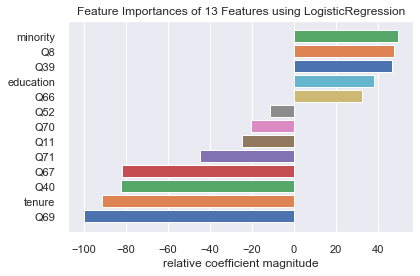

In [44]:
from yellowbrick.model_selection import FeatureImportances

viz = FeatureImportances(mlr)
viz.fit(X_test, y_test)
viz.show()

In [45]:
dfp = pd.DataFrame([ 0.1776036 ,-0.42566665 , 0.2304105 ,  0.22151662, -0.11520854  ,0.21844607,
  -0.38315182,  0.15089837, -0.05353311, -0.09570196, -0.20858807, -0.46568216,
  -0.38126448], columns=["Weights"])

In [46]:
dfp['Features'] = ['education', 'tenure', 'minority', 'Q8', 'Q11', 'Q39', 'Q40', 'Q66', 'Q52', 'Q70', 'Q71', 'Q69', 'Q67']

In [47]:
dfp

,Weights,Features
0,0.18,education
1,-0.43,tenure
2,0.23,minority
3,0.22,Q8
4,-0.12,Q11
5,0.22,Q39
6,-0.38,Q40
7,0.15,Q66
8,-0.05,Q52
9,-0.10,Q70


In [48]:


#from yellowbrick.model_selection import RFECV

#cv = StratifiedKFold(n_splits=5, random_state=42)
#visualizer = RFECV(LogisticRegression(multi_class="auto", solver="liblinear", random_state=42), cv=cv, scoring='f1_weighted')
#visualizer.fit(X_test, y_test)        # Fit the data to the visualizer
#visualizer.show()   

In [49]:
X.shape

(246068, 76)

In [50]:
X.groupby('Q60').size()

Q60
1    13858
2    15758
3    46434
4    88379
5    81639
dtype: int64

In [51]:
XZ = df[['education', 'tenure', 'minority', 'Q8', 'Q11', 'Q39', 'Q40', 'Q66', 'Q71', 'Q69', 'Q67']]

X2 = sm.add_constant(XZ) 
model6 = sm.Logit(y, X2).fit()
print(model6.summary())

Optimization terminated successfully.
         Current function value: 0.416293
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                leaving   No. Observations:               246068
Model:                          Logit   Df Residuals:                   246056
Method:                           MLE   Df Model:                           11
Date:                Thu, 16 Apr 2020   Pseudo R-squ.:                  0.2335
Time:                        10:21:16   Log-Likelihood:            -1.0244e+05
converged:                       True   LL-Null:                   -1.3364e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6370      0.044     60.333      0.000       2.551       2.723
education      0.1643      0.

In [52]:
X_train, X_test, y_train, y_test = train_test_split(XZ, y, train_size=0.8, test_size=0.2, random_state=42)

mlr = LogisticRegression(penalty='elasticnet', l1_ratio=.5, multi_class="auto", solver="saga", random_state=42)
mlr.fit(X_train, y_train) 
y_predict = mlr.predict(X_test)
print(mlr.coef_)
print(mlr.intercept_)
print(mlr.score(X_train, y_train))
print(mlr.score(X_test, y_test))

[[ 0.1635817  -0.43713524  0.24689419  0.22129042 -0.12287011  0.21521046
  -0.38928428  0.15079927 -0.23053618 -0.49223595 -0.40767281]]
[2.61069566]
0.8199223790220164
0.8199496078351689


C:\Users\Jungd\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
C:\Users\Jungd\Anaconda3\lib\site-packages\yellowbrick\model_selection\importances.py:195: YellowbrickWarning: detected multi-dimensional feature importances but stack=False, using mean to aggregate them.
  YellowbrickWarning,


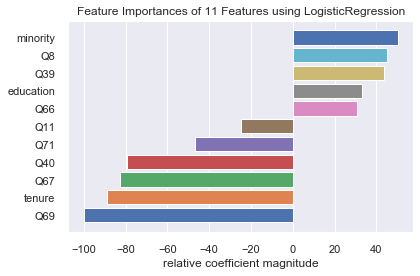

In [54]:
viz = FeatureImportances(mlr)
viz.fit(X_test, y_test)
viz.show()

C:\Users\Jungd\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
C:\Users\Jungd\Anaconda3\lib\site-packages\yellowbrick\model_selection\importances.py:195: YellowbrickWarning: detected multi-dimensional feature importances but stack=False, using mean to aggregate them.
  YellowbrickWarning,


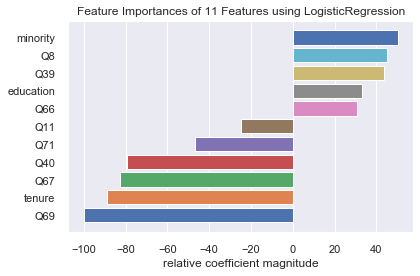

In [55]:
viz = FeatureImportances(mlr)
viz.fit(X_train, y_train)
viz.show()

C:\Users\Jungd\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
C:\Users\Jungd\Anaconda3\lib\site-packages\yellowbrick\model_selection\importances.py:195: YellowbrickWarning: detected multi-dimensional feature importances but stack=False, using mean to aggregate them.
  YellowbrickWarning,


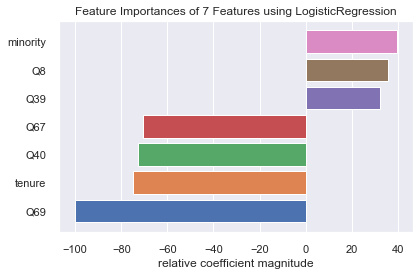

[[-0.45302602  0.23940122  0.21665145  0.19355631 -0.4391723  -0.60333407
  -0.42575137]]
0.8179818545724242
0.8177754297557606


In [67]:
XF = df[['tenure', 'minority', 'Q8', 'Q39', 'Q40', 'Q69', 'Q67']]

X_train, X_test, y_train, y_test = train_test_split(XF, y, train_size=0.8, test_size=0.2, random_state=42)

mlr = LogisticRegression(penalty='elasticnet', l1_ratio=.5, multi_class="auto", solver="saga", random_state=42)
mlr.fit(X_train, y_train) 
y_predict = mlr.predict(X_test)
viz = FeatureImportances(mlr)
viz.fit(X_train, y_train)
viz.show()
print(mlr.coef_)
print(mlr.score(X_train, y_train))
print(mlr.score(X_test, y_test))

In [68]:
XZ.shape

(246068, 11)

In [69]:
scaler.fit(XZ)
XY = scaler.transform(XZ)
XY

array([[-1.36409002,  0.23576956, -0.71720692, ...,  0.21139981,
         0.06566454,  0.54315174],
       [-0.11290129, -1.03632938,  1.39429776, ...,  0.21139981,
         0.06566454,  0.54315174],
       [-0.11290129,  1.50786851,  1.39429776, ...,  0.21139981,
        -0.93451761,  0.54315174],
       ...,
       [-0.11290129,  0.23576956, -0.71720692, ...,  0.21139981,
         0.06566454,  0.54315174],
       [-0.11290129, -1.03632938,  1.39429776, ...,  0.21139981,
         0.06566454,  0.54315174],
       [ 1.13828744,  0.23576956,  1.39429776, ...,  0.21139981,
        -0.93451761, -0.277143  ]])

C:\Users\Jungd\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
C:\Users\Jungd\Anaconda3\lib\site-packages\yellowbrick\model_selection\importances.py:195: YellowbrickWarning: detected multi-dimensional feature importances but stack=False, using mean to aggregate them.
  YellowbrickWarning,


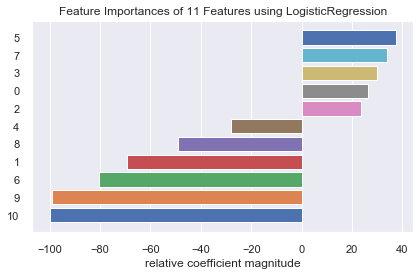

[[ 0.13073621 -0.343637    0.11694208  0.14863584 -0.13970551  0.1863684
  -0.39996245  0.1692887  -0.24322708 -0.49217699 -0.49696535]]
0.8199172991150803
0.8199496078351689


In [70]:
X_train, X_test, y_train, y_test = train_test_split(XY, y, train_size=0.8, test_size=0.2, random_state=42)

mlr = LogisticRegression(penalty='elasticnet', l1_ratio=.5, multi_class="auto", solver="saga", random_state=42)
mlr.fit(X_train, y_train) 
y_predict = mlr.predict(X_test)
viz = FeatureImportances(mlr)
viz.fit(X_train, y_train)
viz.show()
print(mlr.coef_)
print(mlr.score(X_train, y_train))
print(mlr.score(X_test, y_test))

In [53]:
from yellowbrick.model_selection import RFECV

visualizer = RFECV(LogisticRegression(penalty='elasticnet', l1_ratio=.5, multi_class="auto", solver="saga", random_state=42))
visualizer.fit(X_test, y_test)        # Fit the data to the visualizer
visualizer.show()  

TypeError: __init__() got an unexpected keyword argument 'scoring'